In [1]:
%matplotlib inline
#%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D

from sympy.physics.hydrogen import E_nl, R_nl
from sympy.plotting import plot, plot3d
from sympy import *

import scipy.special as ss
import numpy as np
import math

In [2]:
var("x y z R")
n, l, m, Z = symbols("n l m Z")
r = sqrt((x**2 + y**2 + z**2))

In [3]:
R_nl(n, l, r, Z)

2*(2*Z*sqrt(x**2 + y**2 + z**2)/n)**l*sqrt(Z**3*factorial(-l + n - 1)/(n**4*factorial(l + n)))*exp(-Z*sqrt(x**2 + y**2 + z**2)/n)*assoc_laguerre(-l + n - 1, 2*l + 1, 2*Z*sqrt(x**2 + y**2 + z**2)/n)

In [4]:
def Y_lm(l, m):
    if l==0:
        if m == 0:
            return 1/sqrt(4*pi)
        else:
            return 0
    elif l==1:
        if m == -1:
            return sqrt(3/(4*pi))*x/r
        elif m == 0:
            return sqrt(3/(4*pi))*z/r
        elif m == 1:
            return sqrt(3/(4*pi))*y/r
        else:
            return 0
    elif l==2:
        if m == -2:
            return sqrt(15/(4*pi))*(x*y)/(r**2) 
        if m == -1:
            return sqrt(15/(4*pi))*(x*z)/(r**2)
        elif m == 0:
            return sqrt(15/(4*pi))*(3*z**2-r**2)/(2*r**2*sqrt(3))
        elif m == 1:
            return sqrt(15/(4*pi))*(x*z)/(r**2)
        elif m == 2:
            return sqrt(15/(4*pi))*(x**2-y**2)/(2*r**2)
        else:
            return 0
    elif l==3:
        if m == -3:
            return sqrt(105/(4*pi))*x*(3*x**2-y**2)/(2*r**3*sqrt(3)) 
        if m == -2:
            return sqrt(105/(4*pi))*x*y*z/(r**3)
        if m == -1:
            return sqrt(105/(4*pi))*x*(4*z**2-x**2-y**2)/(2*r**3*sqrt(10))
        elif m == 0:
            return sqrt(105/(4*pi))*z*(2*z**2-3*x**2-3*y**2)/(2*r**3*sqrt(15))
        elif m == 1:
            return sqrt(105/(4*pi))*y*(4*z**2-x**2-y**2)/(2*r**3*sqrt(10))
        elif m == 2:
            return sqrt(105/(4*pi))*z*(x**2-y**2)/(2*r**3)
        elif m == 3:
            return sqrt(105/(4*pi))*y*(3*x**2-y**2)/(2*r**3*sqrt(3))
        else:
            return 0
    else:
        return 0

In [5]:
Y_lm(1,0)

sqrt(3)*z/(2*sqrt(pi)*sqrt(x**2 + y**2 + z**2))

In [15]:
def HWF_nlm(n, l, m):
    return str(R_nl(n,l,r,1)*Y_lm(l,m)).replace("x","X").replace("y","Y").replace("z","Z").replace("eXp","np.exp").replace("sqrt","np.sqrt").replace("sin","np.sin").replace("cos","np.cos").replace("acos","np.arccos").replace("atan","np.arctan").replace("pi","np.pi")

In [17]:
HWF_nlm(2,1,-1)

'np.sqrt(2)*X*np.exp(-np.sqrt(X**2 + Y**2 + Z**2)/2)/(8*np.sqrt(np.pi))'

In [18]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
def colormap(k):
    """shifted bwr colormap"""
    if (k < 0) or (k > 1):
        raise ValueError('k must be between 0 and 1')

    cdict = {'red': ((0.0, max(-2*k+1, 0), max(-2*k+1, 0)),
                     (k,   1.0, 1.0),
                     (1.0, 1.0, 1.0)),

             'green': ((0.0, max(-2*k+1, 0), max(-2*k+1, 0)),
                       (k,   1.0, 1.0),
                       (1.0, max(2*k-1,0),  max(2*k-1,0))),

             'blue': ((0.0, 1.0, 1.0),
                      (k,   1.0, 1.0),
                      (1.0, max(2*k-1,0), max(2*k-1,0))),

             'alpha': ((0.0, 1-max(-2*k+1, 0), 1-max(-2*k+1, 0)),
                      (k,   0.0, 0.0),
                      (1.0, 1-max(2*k-1,0),  1-max(2*k-1,0)))
             }

    return LinearSegmentedColormap('shifted_rwb', cdict)

In [19]:
cmap = colormap(0.5)

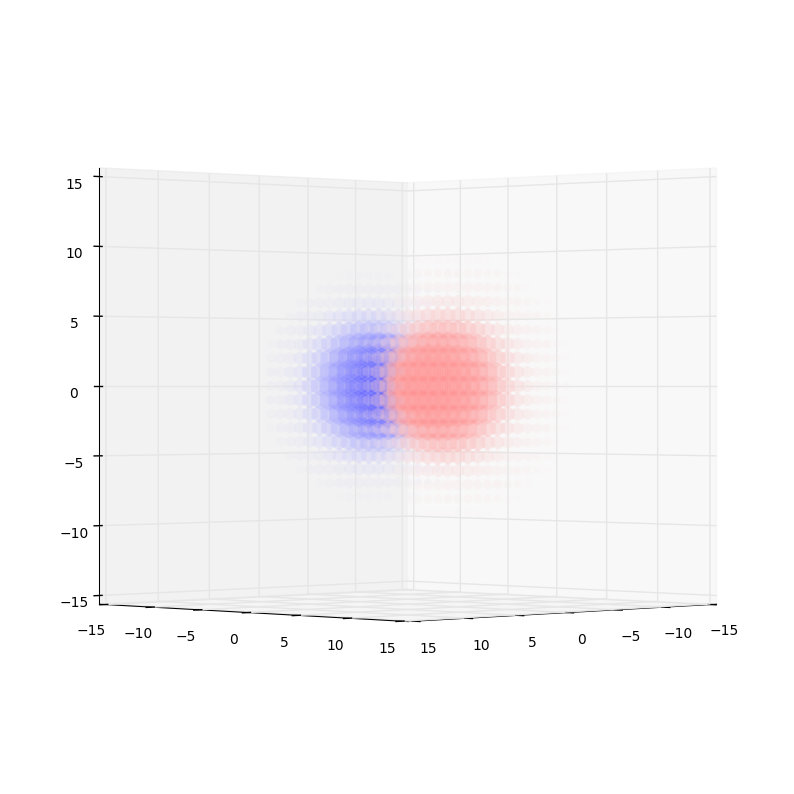

In [20]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

width = 10
resol = 21

a = np.linspace(-width,width,resol)
b = np.linspace(-width,width,resol)
c = np.linspace(-width,width,resol)

[X, Y, Z] = np.meshgrid(a, b, c)

C = eval(HWF_nlm(2,1,1))
S = np.abs(C)*10000

ax.scatter(X, Y, Z, c=C, s=S, cmap=cmap, marker='h', linewidths=0)

cmap =  colormap(.5)
ax.view_init(elev=0, azim=45)
plt.show()

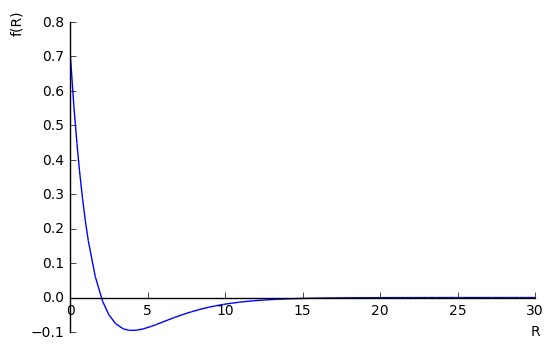

In [21]:
plot(R_nl(2,0,R), (R, 0, 30))

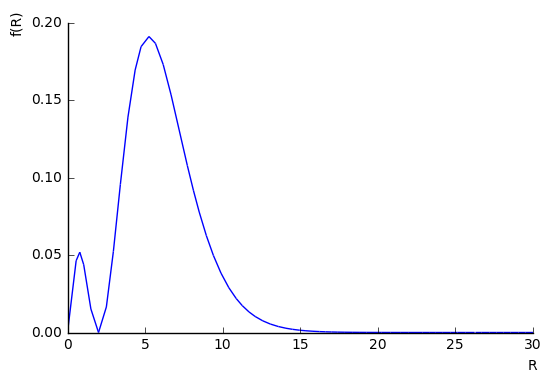

In [22]:
plot(R_nl(2,0,R)**2 * R**2, (R, 0, 30))

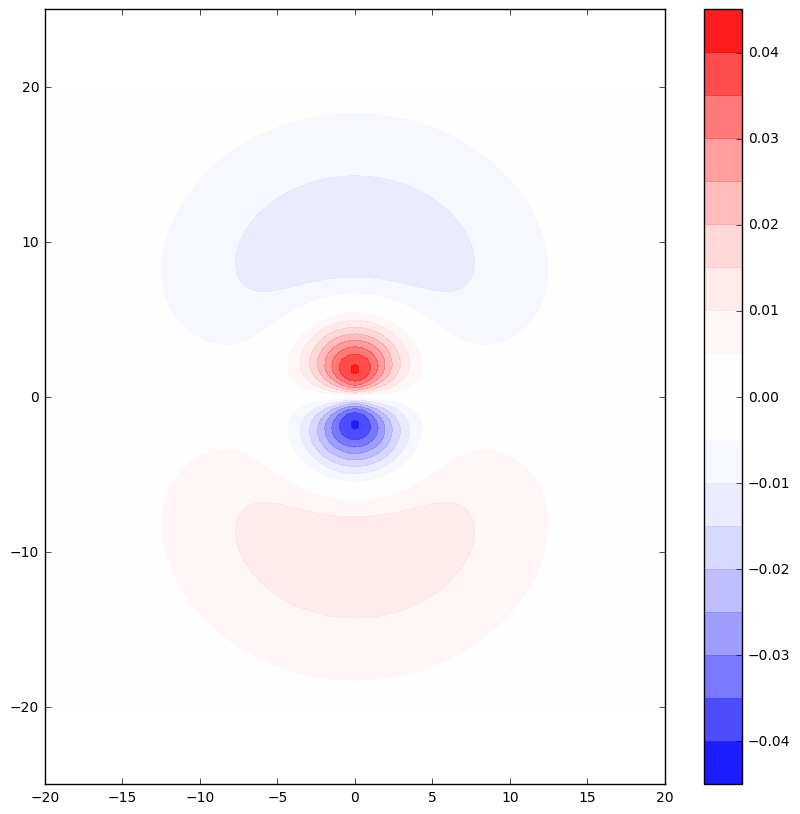

In [23]:
fig = plt.figure(figsize=(10,10))
#ax = fig.add_subplot(111, projection='3d')

width = 20
resol = 101

a = np.linspace(-width,width,resol)
b = np.linspace(-width,width,resol)

[X, Y] = np.meshgrid(a, b)
Z = 0

C = eval(HWF_nlm(3,1,1))
S = np.abs(C)*10000

cmap =  colormap(.5)

plt.axis('equal')
plt.contourf(X, Y, C, 20, cmap=cmap)
plt.colorbar()
plt.show()